# 多項式特徴量で線形を超える！

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

df = sns.load_dataset('mpg')

# NaNがある行をすべて削除
df.dropna(inplace=True)
X = df['horsepower'].values.reshape(-1, 1)
y = df['mpg'].values

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='horsepower', ylabel='mpg'>

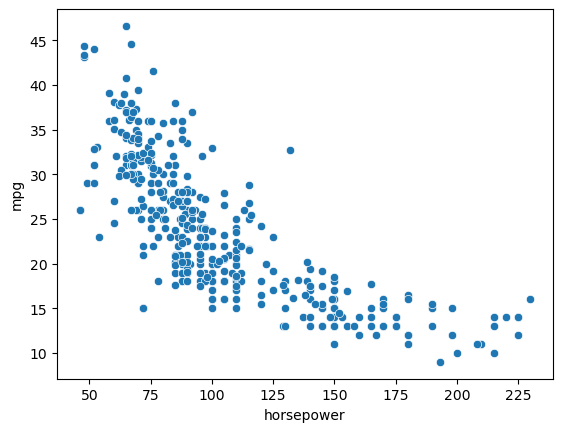

In [4]:
#x,yをキーワード引数として渡してと警告されているが、分布を見るだけなので無視
sns.scatterplot(df['horsepower'], df['mpg'])

In [9]:
#多項式特徴量に変換(d = 2)
from sklearn.preprocessing import PolynomialFeatures

#引数にinclude_bias = Falseを指定するとバイアス項を生成しない
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

#3つ目がX^2の列になる 
X_poly

array([[1.0000e+00, 1.3000e+02, 1.6900e+04],
       [1.0000e+00, 1.6500e+02, 2.7225e+04],
       [1.0000e+00, 1.5000e+02, 2.2500e+04],
       ...,
       [1.0000e+00, 8.4000e+01, 7.0560e+03],
       [1.0000e+00, 7.9000e+01, 6.2410e+03],
       [1.0000e+00, 8.2000e+01, 6.7240e+03]])

In [7]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_poly, y)
model.coef_

array([ 0.        , -0.46618963,  0.00123054])

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


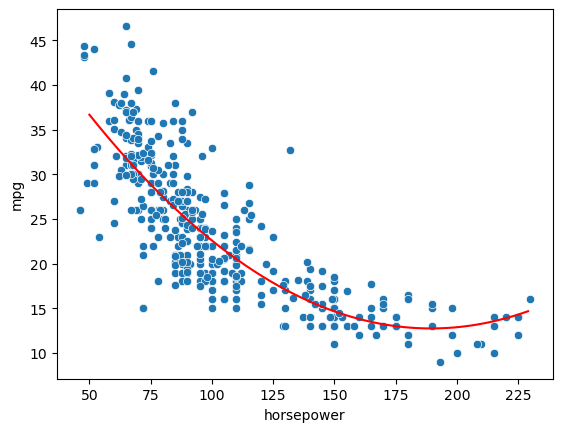

In [19]:
import numpy as np

# x軸
x = np.arange(50, 230).reshape(-1, 1)

#predict前にfit_transformでX^2列追加
x_ = poly.fit_transform(x)
pred_ = model.predict(x_)

sns.scatterplot(df['horsepower'], df['mpg'])
plt.plot(x, pred_, 'r')

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


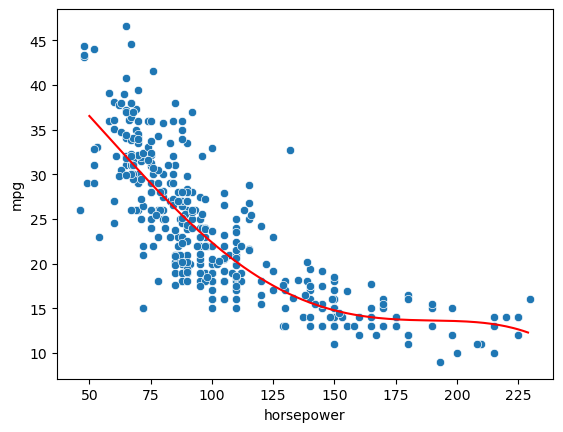

In [28]:
#d=４でやってみる => あまりd=2と変わらないが、d=4以降は歪み出す(フィットしすぎ？？)

poly = PolynomialFeatures(degree=4)
X_poly = poly.fit_transform(X)

model = LinearRegression()
model.fit(X_poly, y)

x = np.arange(50, 230).reshape(-1, 1)

x_ = poly.fit_transform(x)
pred_ = model.predict(x_)

sns.scatterplot(df['horsepower'], df['mpg'])
plt.plot(x, pred_, 'r')